In [ ]:
!apt-get install -y r-base
!pip install rpy2
%load_ext rpy2.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...

Call:
lm(formula = as.numeric(vs) ~ mpg + am, data = mtcars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65671 -0.24013 -0.03289  0.22379  0.68162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10722    0.24409   0.439   0.6637    
mpg          0.07355    0.01340   5.490  6.5e-06 ***
am1         -0.36283    0.16181  -2.242   0.0328 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resi

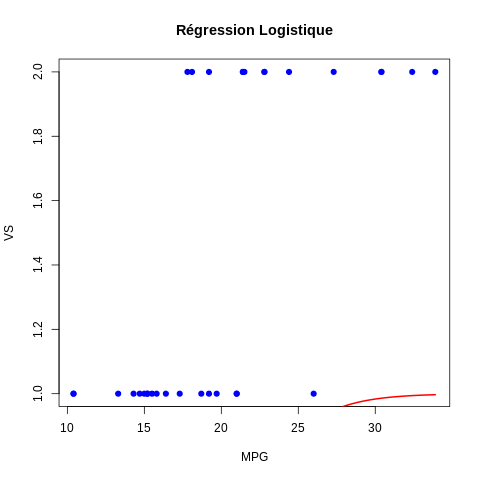

In [ ]:
%%R
# Charger le dataset intégré
data(mtcars)

# Vérifier les premières lignes
head(mtcars)

# Vérifier la structure des données
str(mtcars)
# Convertir la variable vs en facteur (binaire)
mtcars$vs <- as.factor(mtcars$vs)

# Ajuster le modèle logistique
logit_model_mpg <- glm(vs ~ mpg, data = mtcars, family = binomial)

# Afficher le résumé du modèle
summary(logit_model_mpg)
# Calcul de l'odds ratio
exp(coef(logit_model_mpg))
# Tracer les données
plot(mtcars$mpg, mtcars$vs, pch = 19, col = "blue", xlab = "MPG", ylab = "VS", main = "Régression Logistique")

# Générer une courbe logistique
curve(predict(logit_model_mpg, newdata = data.frame(mpg = x), type = "response"),
      add = TRUE, col = "red", lwd = 2)
library(ggplot2)

# Tracer le modèle logistique
ggplot(mtcars, aes(x = mpg, y = as.numeric(vs))) +
  geom_point(color = "blue") +
  stat_smooth(method = "glm", method.args = list(family = "binomial"), color = "red") +
  labs(title = "Régression Logistique de VS en fonction de MPG", x = "MPG", y = "VS")
# Convertir am en facteur (binaire)
mtcars$am <- as.factor(mtcars$am)

# Ajuster un modèle logistique avec am comme variable prédictive
logit_model_am <- glm(vs ~ am, data = mtcars, family = binomial)

# Afficher le résumé du modèle
summary(logit_model_am)
# Modèle avec deux variables explicatives
logit_model_mpg_am <- glm(vs ~ mpg + am, data = mtcars, family = binomial)

# Afficher le résumé du modèle
summary(logit_model_mpg_am)
# Ajuster un modèle probit
probit_model <- glm(vs ~ mpg + am, data = mtcars, family = binomial(link = "probit"))

# Comparer les résultats
summary(probit_model)
AIC(logit_model_mpg_am, probit_model)
# Ajuster un modèle de régression linéaire
lm_model <- lm(as.numeric(vs) ~ mpg + am, data = mtcars)

# Afficher le résumé
summary(lm_model)


 Analyse de la Variable VS dans le Dataset MTCARS

Objectif :
Analyser la variable vs (type de moteur) en fonction de mpg (consommation) et am (type de transmission).

Méthodes :
Régression logistique pour modéliser la probabilité que vs = 1.
Comparaison avec un modèle probit.
Régression linéaire pour observer les différences.

Résultats :
mpg a un effet significatif : une consommation plus élevée (mpg plus grand) est associée à une probabilité plus élevée de vs = 1.
am (transmission manuelle/automatique) influence vs, mais son effet est moins marqué.
Le modèle logistique est plus performant que le modèle linéaire.

Conclusion :
La consommation de carburant (mpg) est le facteur principal qui influence le type de moteur (vs).